#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### VARIOUS CHAPTERS
**Simulations, graphs**

version 0.91 2020-10-02

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_out = dirname + "da_case_studies/da_illustrations/"
output = dirname + "da_case_studies/da_illustrations//output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import da_helper_functions as da

sns.set_theme(rc=da.da_theme, palette=da.color)

### Figure 3.8 The structure of the box plot and the violin plot

In [4]:
data_in = dirname + "da_data_repo/wms-management-survey/clean/"

# Load the data
df = pd.read_csv(data_in + "wms_da_textbook.csv")

# Sample selection
df = df.loc[
    (df["country"] == "Mexico")
    & (df["wave"] == 2013)
    & (df["emp_firm"] >= 100)
    & (df["emp_firm"] <= 5000)
]

df = df.loc[df["emp_firm"] < 200, ["management"]]
df["emp3bins"] = "Small"

q1 = np.quantile(df["management"], 0.25)
q2 = np.quantile(df["management"], 0.5)
q3 = np.quantile(df["management"], 0.75)
iqr = q3 - q1
ub = max(df.loc[df["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df.loc[df["management"] >= q1 - 1.5 * iqr, "management"])
out_lb = min(df["management"])
_min = min(df["management"])
_max = max(df["management"])

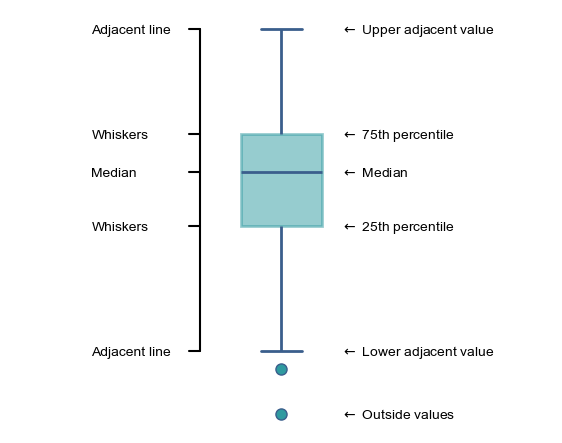

In [5]:
fig, ax = plt.subplots()
sns.boxplot(
    data=df,
    x="emp3bins",
    y="management",
    width=0.15,
    ax=ax,
    flierprops=dict(
        marker="o",
        markerfacecolor=da.color[4],
        markeredgecolor=da.color[0],
        markersize=8,
    ),
    fliersize=8,
    linewidth=2,
    boxprops=dict(
        facecolor=da.color[0],
        edgecolor=da.color[0],
        color=da.color[4],
        linewidth=2,
        alpha=0.5,
    ),
    whiskerprops=dict(color=da.color[0], linewidth=2),
    capprops=dict(color=da.color[0], linewidth=2),
    medianprops=dict(color=da.color[0], linewidth=2),
)

rann_x = 0.11

# Annotations on right
ax.annotate("$\\leftarrow$ Upper adjacent value", xy=(rann_x, ub - 0.03), fontsize=10)
ax.annotate("$\\leftarrow$ 75th percentile", xy=(rann_x, q3 - 0.03), fontsize=10)
ax.annotate("$\\leftarrow$ Median", xy=(rann_x, q2 - 0.03), fontsize=10)
ax.annotate("$\\leftarrow$ 25th percentile", xy=(rann_x, q1 - 0.03), fontsize=10)
ax.annotate("$\\leftarrow$ Lower adjacent value", xy=(rann_x, lb - 0.03), fontsize=10)
ax.annotate("$\\leftarrow$ Outside values", xy=(rann_x, out_lb - 0.03), fontsize=10)

lann_x = -0.35

# Annotations on left
ax.annotate("Adjacent line", xy=(lann_x, ub - 0.03), fontsize=10)
ax.annotate("Whiskers", xy=(lann_x, q3 - 0.03), fontsize=10)
ax.annotate("Median", xy=(lann_x, q2 - 0.03), fontsize=10)
ax.annotate("Whiskers", xy=(lann_x, q1 - 0.03), fontsize=10)
ax.annotate("Adjacent line", xy=(lann_x, lb - 0.03), fontsize=10)

# Segment lines using ax.plot
segments_y = [lb, q1, q2, q3, ub]
for y in segments_y:
    ax.plot([-0.17, -0.15], [y, y], color="black", lw=1.5)
ax.plot([-0.15, -0.15], [lb, ub], color="black", lw=1.5)


# Remove all spines (borders around the plot)
sns.despine(left=True, bottom=True)

# Remove axis background
ax.figure.set_facecolor("none")  # remove the figure background

# Optional: Remove grid if still visible
ax.grid(False)
# Remove ticks and tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove axis labels
ax.set_xlabel("")
ax.set_ylabel("")

plt.xlim(-0.5, 0.5)

plt.show()

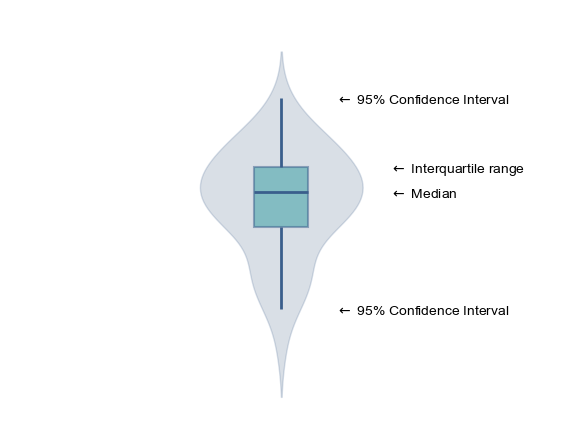

In [6]:
fig, ax = plt.subplots()

# Overlayed boxplot
sns.boxplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    width=0.1,
    fliersize=0,  # equivalent to suppressing outliers
    linewidth=0.6,
    boxprops=dict(
        facecolor=da.color[4], edgecolor=da.color[0], alpha=0.5, linewidth=1.5
    ),
    medianprops=dict(color=da.color[0], linewidth=2),
    whiskerprops=dict(color=da.color[0], linewidth=2),
    capprops=dict(linewidth=0),
)

# Violin plot
sns.violinplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    width=0.3,
    inner=None,  # no inner boxplot or points
    linewidth=1,
    edgecolor=da.color[0],
    cut=2,
    color=da.color[0],
    alpha=0.2,
)

# Remove all spines
sns.despine(left=True, bottom=True)

# Remove background and ticks/labels
ax.figure.set_facecolor("none")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("")
ax.set_ylabel("")

# Adjust Y-limits
ax.set_ylim(1, 4)

# Annotations (customize ub, lb, q2, q3 based on your data)
ax.annotate("$\\leftarrow$ 95% Confidence Interval", xy=(0.1, ub - 0.05), fontsize=10)
ax.annotate("$\\leftarrow$ 95% Confidence Interval", xy=(0.1, lb - 0.05), fontsize=10)
ax.annotate("$\\leftarrow$ Interquartile range", xy=(0.2, q3 - 0.05), fontsize=10)
ax.annotate("$\\leftarrow$ Median", xy=(0.2, q2 - 0.05), fontsize=10)

plt.xlim(-0.5, 0.5)
plt.ylim(0.5, 4.5)
plt.show()

### Figure 6.2 The probability of a false positive

In [7]:
from scipy.stats import t, nct

df = 200
x = np.arange(-2.5, 2.5, 0.01).round(3)
d = t.pdf(x, df)

data = pd.DataFrame({"x": x, "d": d})

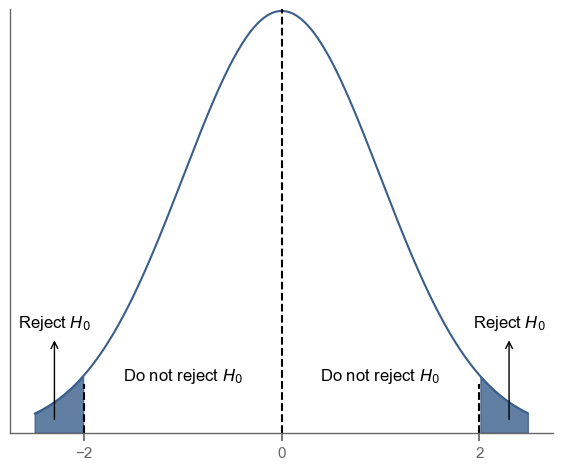

In [8]:
# Line plot
sns.lineplot(data, x="x", y="d")

# Shaded areas
plt.fill_between(x, d, where=(x < -2), color=da.color[0], alpha=0.8)
plt.fill_between(x, d, where=(x > 2), color=da.color[0], alpha=0.8)

for val in [-2, 0, 2]:
    plt.vlines(
        x=val, ymax=np.exp(-(val**2)) / 0.4, ymin=0, color="black", linestyle="dashed"
    )


# Annotations
plt.text(-1, 0.05, "Do not reject " + r"$H_{0}$", fontsize=12, ha="center")
plt.text(1, 0.05, "Do not reject " + r"$H_{0}$", fontsize=12, ha="center")
plt.text(2.3, 0.1, "Reject " + r"$H_{0}$", fontsize=12, ha="center")
plt.text(-2.3, 0.1, "Reject " + r"$H_{0}$", fontsize=12, ha="center")
plt.annotate(
    "",
    xy=(-2.3, 0.09),
    xytext=(-2.3, 0.01),
    arrowprops=dict(color="black", arrowstyle="->"),
)
plt.annotate(
    "",
    xy=(2.3, 0.09),
    xytext=(2.3, 0.01),
    arrowprops=dict(color="black", arrowstyle="->"),
)

# Labels and scales
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, 0.4)
plt.xticks([-2, 0, 2])
plt.yticks([])
plt.grid(False)
sns.despine(top=True, right=True)

plt.show()

### Figure 6.3 The probabilities of a true positive and a false negative

In [9]:
df = 200
x = np.arange(-3, 6, 0.01).round(3)
d = t.pdf(x, df)

nc = 2.6
d2 = nct.pdf(x, df, nc)

d = pd.DataFrame({"x": x, "y": d, "line": "d", "fill": None})
d2 = pd.DataFrame({"x": x, "y": d2, "line": "d2", "fill": None})

d2.loc[d2["x"] < 2, "fill"] = "#541352"
d2.loc[d2["x"] > 2, "fill"] = "#3a5e8c"

data = pd.concat([d, d2], axis=0)

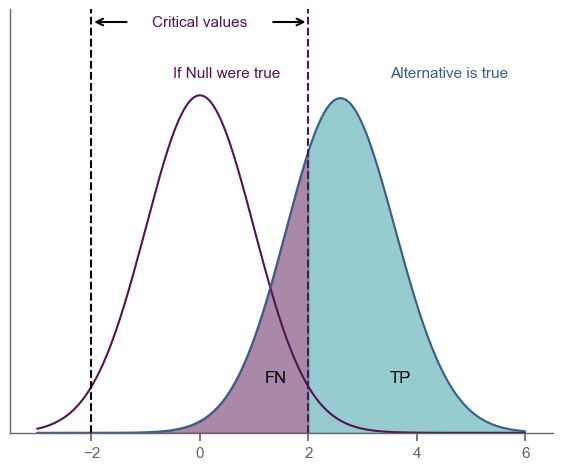

In [10]:
sns.lineplot(
    x="x",
    y="y",
    hue="line",
    data=data,
    linewidth=1.5,
    palette=[da.color[2], da.color[0]],
    legend=False,
)

plt.fill_between(
    d2[d2["x"] < 2]["x"], d2[d2["x"] < 2]["y"], color=da.color[2], alpha=0.5
)
plt.fill_between(
    d2[d2["x"] > 2]["x"], d2[d2["x"] > 2]["y"], color=da.color[4], alpha=0.5
)

plt.axvline(x=-2, linestyle="--", color="black")
plt.axvline(x=2, linestyle="--", color=da.color[2])

plt.annotate(
    None,
    xy=(-2, 0.485),
    xytext=(-1.3, 0.485),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.annotate(
    None,
    xy=(2, 0.485),
    xytext=(1.3, 0.485),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)

plt.text(3.5, 0.42, "Alternative is true", fontsize=11, color=da.color[0])
plt.text(-0.5, 0.42, "If Null were true", fontsize=11, color=da.color[2])
plt.text(0, 0.48, "Critical values", fontsize=11, color=da.color[2], ha="center")
plt.text(1.2, 0.06, "FN", fontsize=12, color="black")
plt.text(3.5, 0.06, "TP", fontsize=12, color="black")

plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, 0.50)
plt.yticks([])
plt.xlim(-3.5, 6.5)
plt.xticks([-2, 0, 2, 4, 6])
plt.grid(False)
sns.despine(left=False, top=True, right=True, bottom=False)

plt.show()

### Figure 13.1 The shape of three loss functions: linear and symmetric, convex and symmetric, convex and asymmetric

In [11]:
x = np.arange(-10, 10, 0.01).round(3)

l1 = pd.DataFrame({"x": x, "y": abs(x), "color": "l1"})
l2 = pd.DataFrame({"x": x, "y": abs(x) + (x**2) / 5, "color": "l2"})
l3 = pd.DataFrame(
    {
        "x": x,
        "y": np.where(x <= 0, abs(x) + (x**2) / 10, abs(x) + (x**2) / 4.4),
        "color": "l3",
    }
)

data = pd.concat([l1, l2, l3])

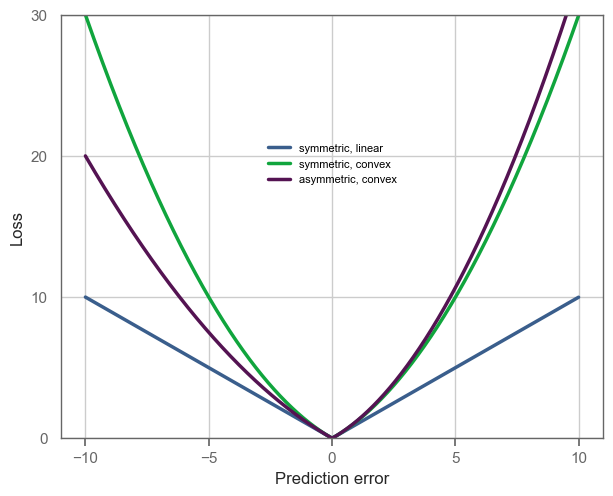

In [12]:
ax = sns.lineplot(data=data, x="x", y="y", hue="color", linewidth=2.5, errorbar=None)

plt.xlabel("Prediction error")
plt.ylabel("Loss")
plt.ylim(0, 30)
plt.yticks([0, 10, 20, 30])
plt.xticks([-10, -5, 0, 5, 10])

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    labels=["symmetric, linear", "symmetric, convex", "asymmetric, convex"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.72),
    fontsize=8,
    frameon=False,
)
plt.show()

### Figure 13.2 Underfitting and overfitting the original data

In [13]:
x = np.arange(1, 21, 1)
original = [
    100,
    90,
    81,
    73,
    67,
    62,
    58,
    55,
    52,
    50,
    48,
    47,
    46,
    45,
    44,
    43,
    42,
    41,
    40,
    39,
]
live = [100, 91, 82, 74, 68, 64, 60, 57, 54, 52, 51, 51, 52, 54, 57, 59, 62, 64, 66, 68]

data = pd.DataFrame({"x": x, "original data": original, "live data": live})

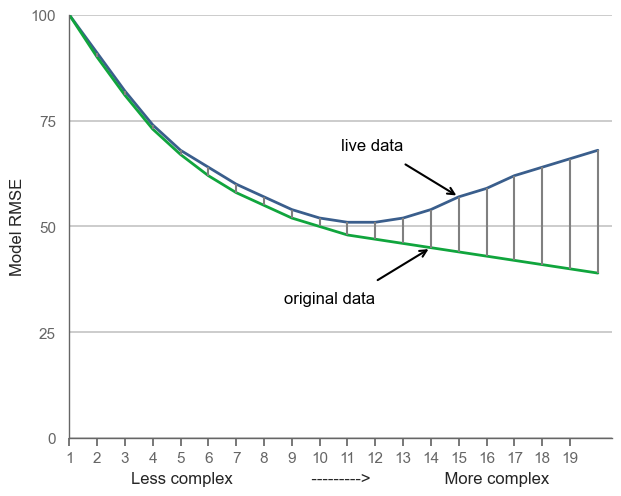

In [14]:
sns.lineplot(x="x", y="live data", data=data, linewidth=2, legend=False)
sns.lineplot(
    x="x", y="original data", data=data, linewidth=2, color=da.color[1], legend=False
)

for x in data["x"].tolist():
    y_live = data.loc[data["x"] == x, "live data"].values[0]
    y_original = data.loc[data["x"] == x, "original data"].values[0]
    plt.vlines(
        x=x, ymin=min(y_live, y_original), ymax=max(y_live, y_original), colors="grey"
    )


# Use a loop for linerange and annotations for cleaner code
for x_val, label, y_offset in [(15, "live data", 8), (14, "original data", -8)]:
    y_val = data.loc[data["x"] == x_val, label].values[0]

    plt.annotate(
        "",
        xy=[x_val, y_val],
        xytext=[x_val - 2, y_val + y_offset],
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    )
    plt.text(
        x_val - 2,
        y_val + y_offset + (4 if label == "live data" else -4),
        label,
        fontsize=12,
        ha="right",
        va="center",
    )

plt.ylim(0, 100)
plt.xlim(1, 20.5)
plt.yticks(np.arange(0, 101, 25))
plt.xticks(np.arange(1, 20, 1))
plt.grid(False)

plt.ylabel("Model RMSE")
plt.xlabel("Less complex                 --------->                More complex")

plt.grid(axis="y", linewidth=1.4, alpha=1)
sns.despine(left=False, bottom=False)
plt.show()

### Figure 22.1 Difference-in-differences: illustration of average outcomes and their changes

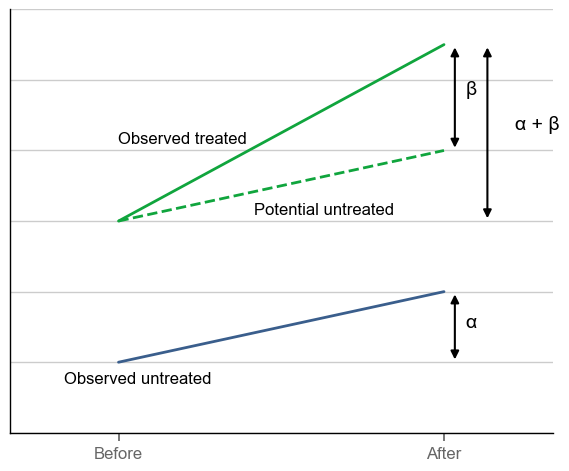

In [15]:
# Data setup
x = np.arange(0, 11, 1)
y = np.arange(0, 11, 1)

d1 = pd.DataFrame({"x": x, "y": y, "color": "l1"})
d2 = pd.DataFrame({"x": x, "y": y, "color": "l2"})

data = pd.concat([d1, d2])
d1_lines = pd.DataFrame({"x": [2, 8], "y": [1, 2], "color": "l1"})
d2_lines = pd.DataFrame({"x": [2, 8], "y": [3, 5.5], "color": "l2"})
d3_lines = pd.DataFrame({"x": [2, 8], "y": [3, 4], "color": "l2"})

data = pd.concat([d1_lines, d2_lines, d3_lines])

alpha_carcode = "\u03b1"
beta_carcode = "\u03b2"


# Lines
sns.lineplot(x="x", y="y", data=d1_lines, linewidth=2, legend=False)
sns.lineplot(x="x", y="y", data=d2_lines, color=da.color[1], linewidth=2, legend=False)
sns.lineplot(
    x="x",
    y="y",
    data=d3_lines,
    linestyle="--",
    color=da.color[1],
    linewidth=2,
    legend=False,
)


plt.annotate("Observed treated", xy=(2, 4.1), xytext=(2, 4.1), fontsize=12)
plt.annotate("Potential untreated", xy=(4.5, 3.1), xytext=(4.5, 3.1), fontsize=12)
plt.annotate("Observed untreated", xy=(1, 0.7), xytext=(1, 0.7), fontsize=12)
plt.annotate(alpha_carcode, xy=(8.4, 1.5), fontsize=14)
plt.annotate(beta_carcode, xy=(8.4, 4.8), fontsize=14)
plt.annotate(alpha_carcode + " + " + beta_carcode, xy=(9.3, 4.3), fontsize=14)

# Double-headed arrows
arrowprops = dict(arrowstyle="<|-|>", color="black", lw=1.5)
plt.annotate("", xy=(8.2, 1), xytext=(8.2, 2), arrowprops=arrowprops, fontsize=12)
plt.annotate("", xy=(8.2, 4), xytext=(8.2, 5.5), arrowprops=arrowprops, fontsize=12)
plt.annotate("", xy=(8.8, 3), xytext=(8.8, 5.5), arrowprops=arrowprops, fontsize=12)


plt.ylim(0, 6)
plt.xlim(0, 10)
plt.xticks([2, 8], ["Before", "After"], fontsize=12)
plt.yticks(range(0, 7), labels=[""] * 7)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.gca().spines[["bottom", "left"]].set_color("black")
plt.xlabel("")
plt.ylabel("")

plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.show()